In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
!ls LogFiles

results_13_1_log.csv   results_20_48_log.csv  results_21_43_log-copy.csv
results_13_2_log.csv   results_21_10_log.csv  results_23_2_log.csv
results_15_34_log.csv  results_21_14_log.csv  results_9_12_log.csv
results_20_34_log.csv  results_21_15_log.csv  results_antonio_log.csv
results_20_43_log.csv  results_21_18_log.csv


In [139]:
df = pd.read_csv('LogFiles/results_21_43_log-copy.csv') 
df.head()

,Seed,Algorithm,Preprocessing Pipeline,Scaling,Sampling,time,precision,recall,result_profit
0,1,LinearRegression,chop_off,StandardScaler,RandomOverSampler_0.2,0:00:02.500011,0.645833,0.502024,0.399
1,1,LinearRegression,Joris_Pipeline,StandardScaler,RandomOverSampler_0.2,0:00:03.617006,0.608434,0.612121,0.464
2,1,LinearRegression,chop_off,StandardScaler,RandomOverSampler_0.5,0:00:03.277124,0.567708,0.592391,0.423
3,1,LinearRegression,Joris_Pipeline,StandardScaler,RandomOverSampler_0.5,0:00:03.112668,0.596386,0.613003,0.457
4,1,LogisticRegression,chop_off,StandardScaler,RandomOverSampler_0.2,0:00:08.091031,0.515625,0.647059,0.419


In [140]:
data_to_plot = df[df.result_profit > 0][['Algorithm','precision','recall']].melt(id_vars=['Algorithm'], var_name='Metric', value_name='values')

In [141]:
data_to_plot.head()

,Algorithm,Metric,values
0,LinearRegression,precision,0.645833
1,LinearRegression,precision,0.608434
2,LinearRegression,precision,0.567708
3,LinearRegression,precision,0.596386
4,LogisticRegression,precision,0.515625


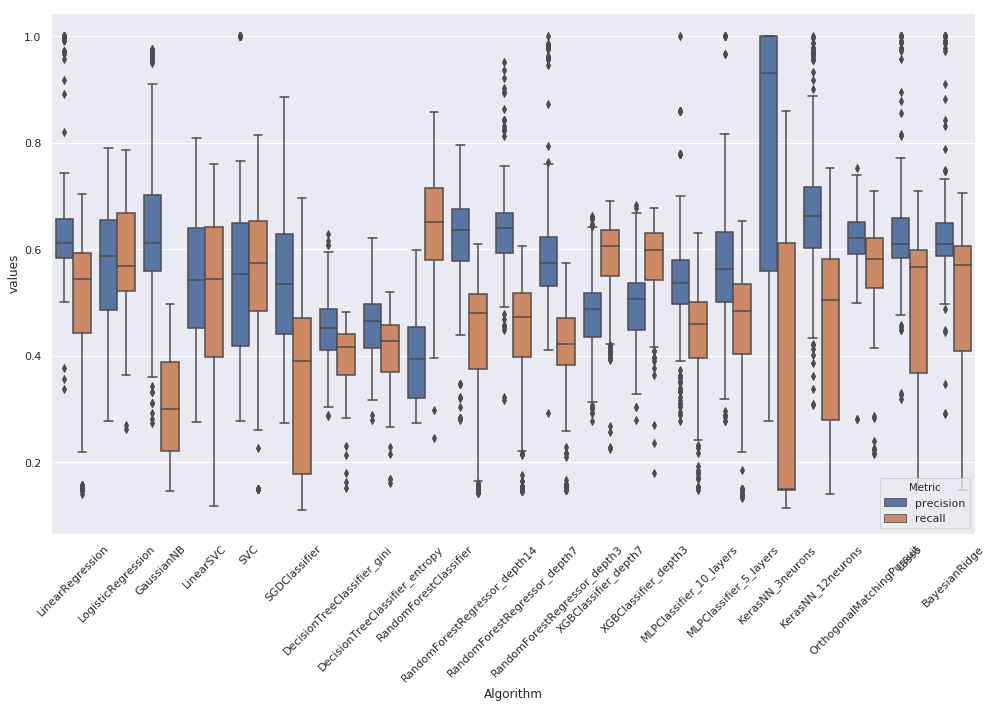

In [142]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='values',data=data_to_plot,hue='Metric')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()

plt.savefig('plots/algorithms_precision_recall_boxplots.png')

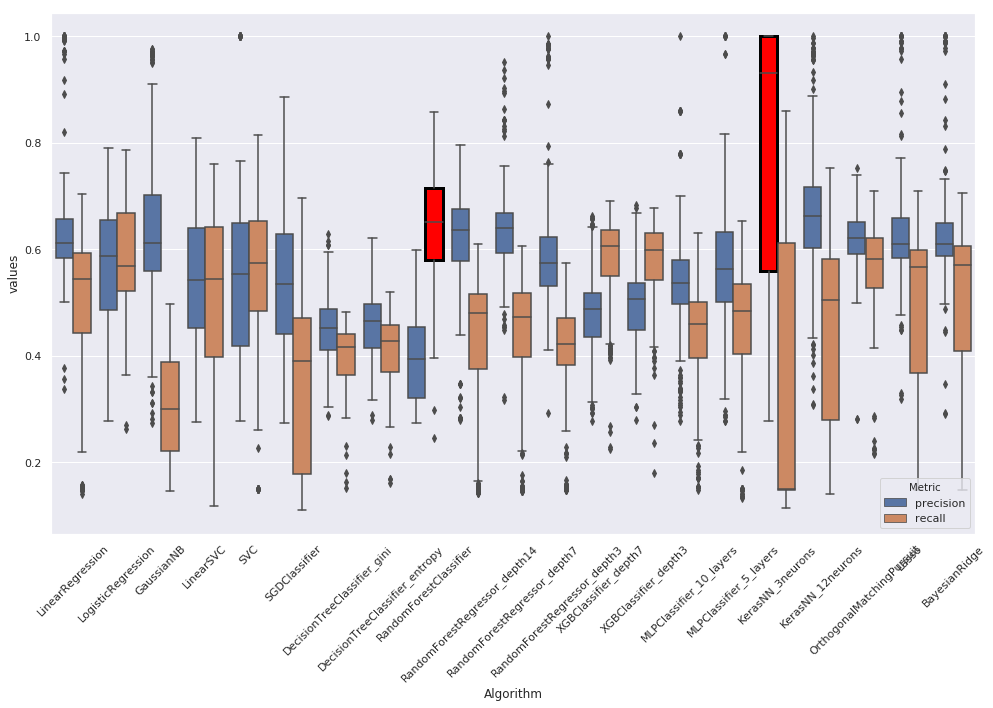

In [143]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='Algorithm', y='values',data=data_to_plot,hue='Metric')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


for box_highlighted in [17,32]:
    # Select which box you want to change    
    mybox = ax.artists[box_highlighted]

    # Change the appearance of that box
    mybox.set_facecolor('red')
    mybox.set_edgecolor('black')
    mybox.set_linewidth(3)

plt.tight_layout()

plt.savefig('plots/algorithms_precision_recall_boxplots_highlighted.png')

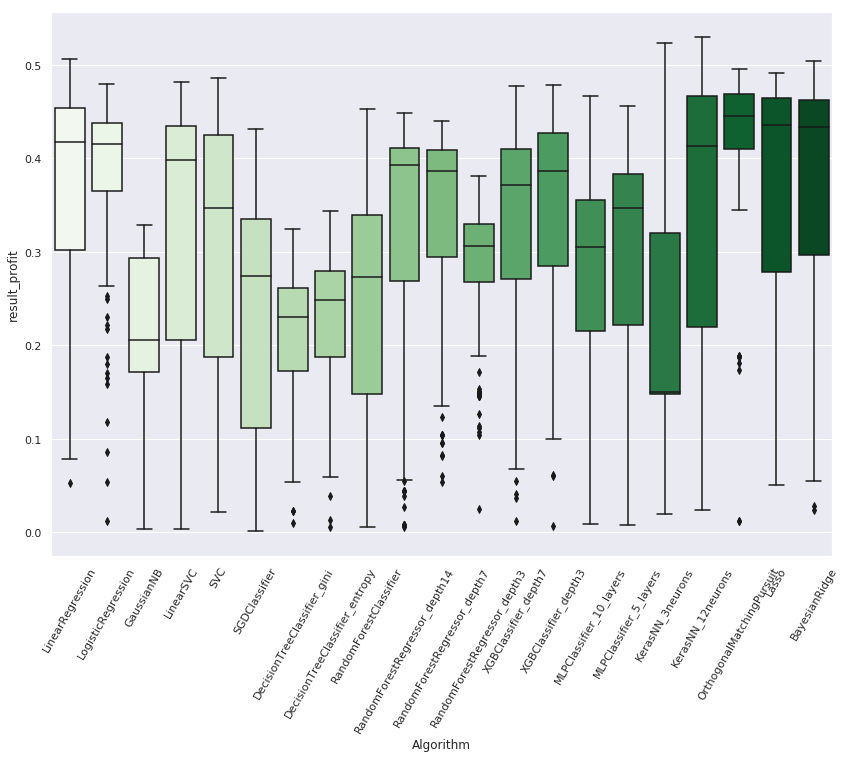

In [144]:
ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/algorithms_profit_share_boxplots_unranked.png')

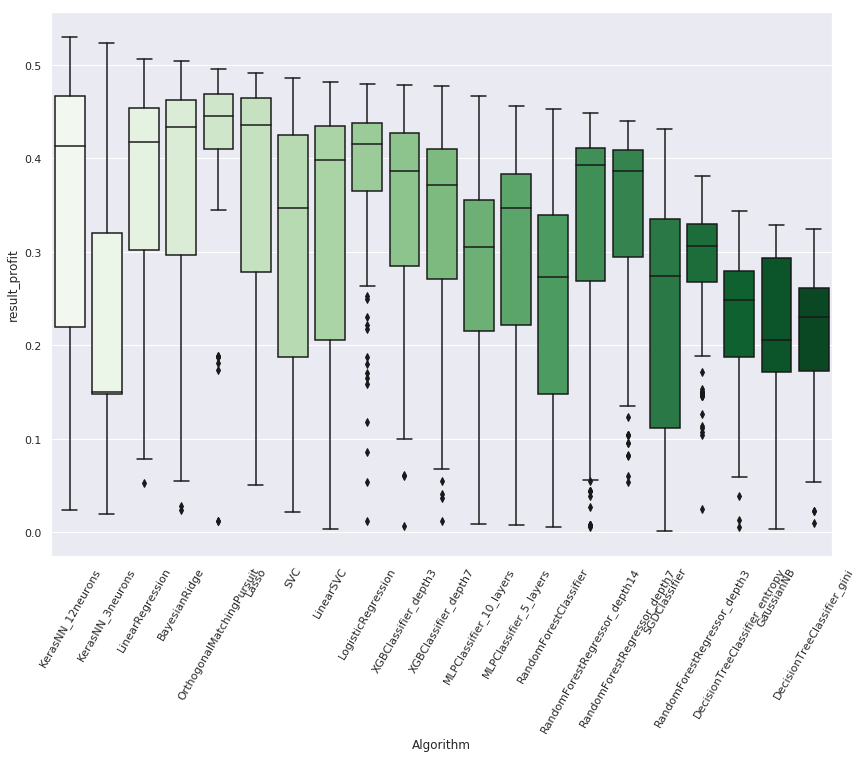

In [145]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].max().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/algorithms_profit_share_boxplots_maxrank.png')

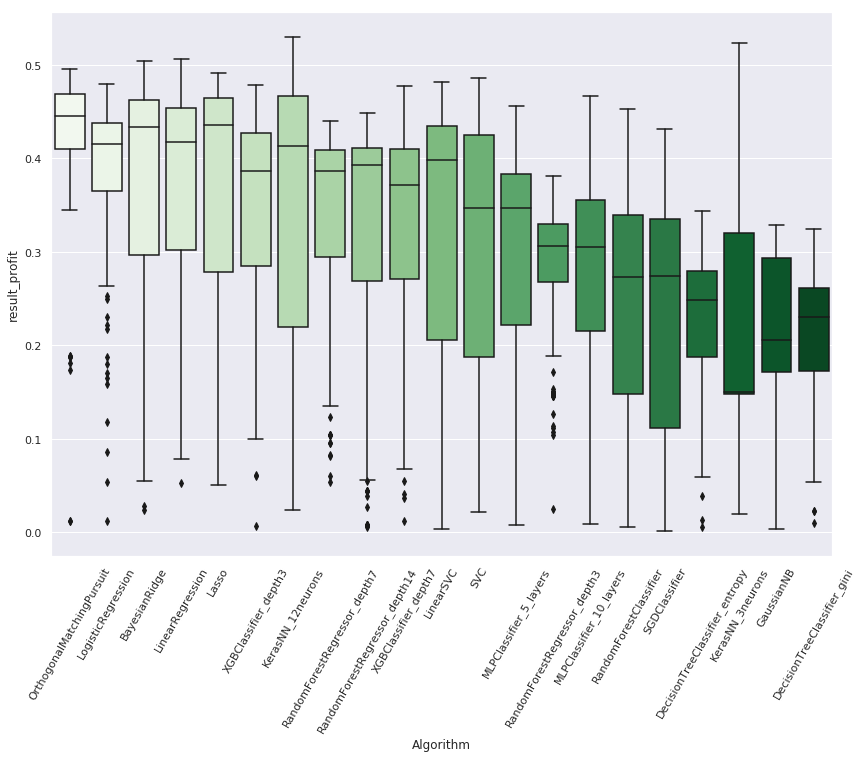

In [146]:
ranks = df[df.result_profit > 0].groupby("Algorithm")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Algorithm', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/algorithms_profit_share_boxplots_meanrank.png')

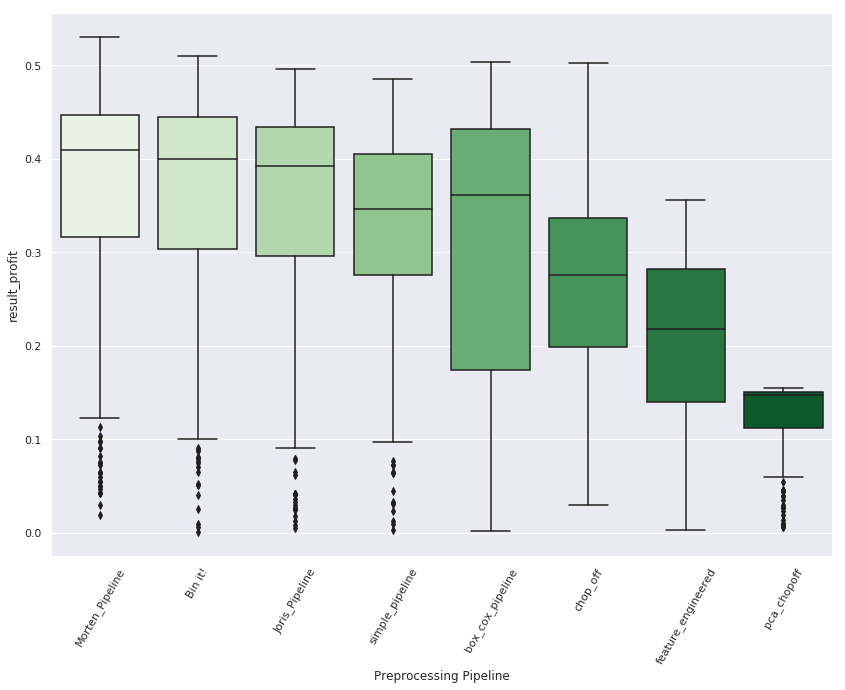

In [147]:
ranks = df[df.result_profit > 0].groupby("Preprocessing Pipeline")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Preprocessing Pipeline', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/pipeline_profit_share_boxplots_meanrank.png')

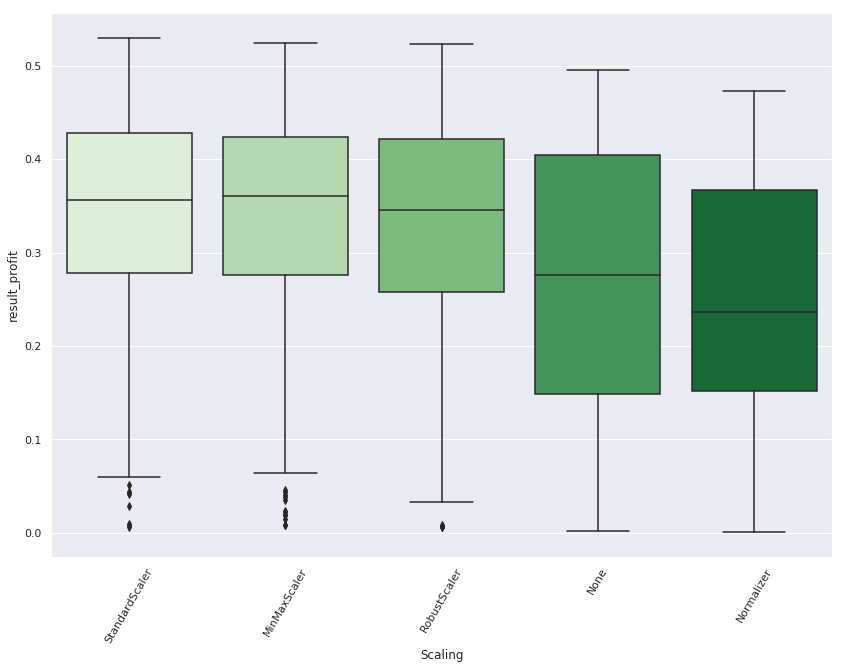

In [148]:
ranks = df[df.result_profit > 0].groupby("Scaling")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Scaling', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/scaling_profit_share_boxplots_meanrank.png')

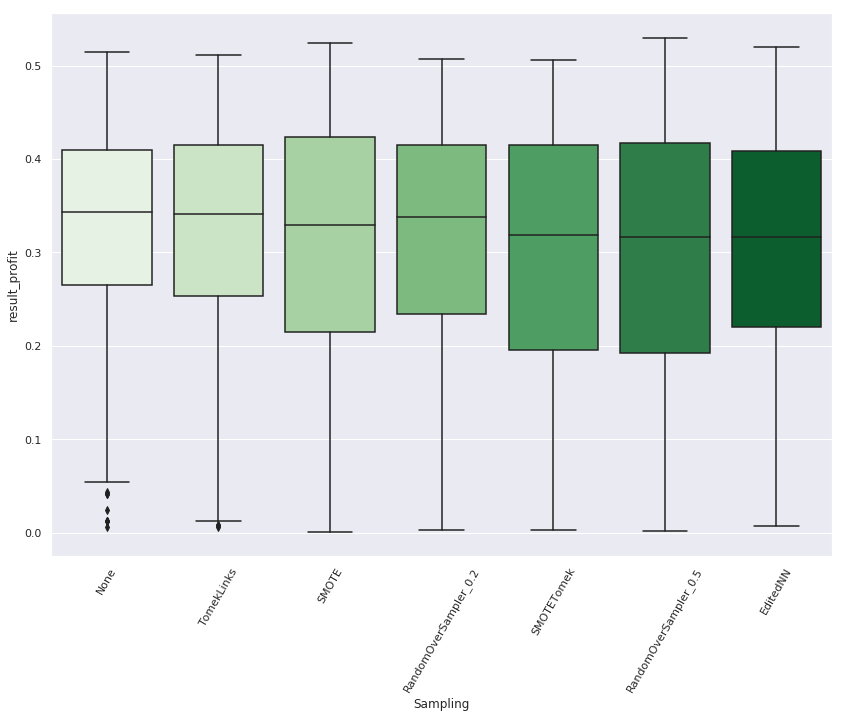

In [149]:
ranks = df[df.result_profit > 0].groupby("Sampling")["result_profit"].mean().fillna(0).sort_values()[::-1].index

ax = sns.boxplot(x='Sampling', y='result_profit',data=df[df.result_profit > 0], palette="Greens", order=ranks)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.savefig('plots/sampling_profit_share_boxplots_meanrank.png')

## Scatterplots


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


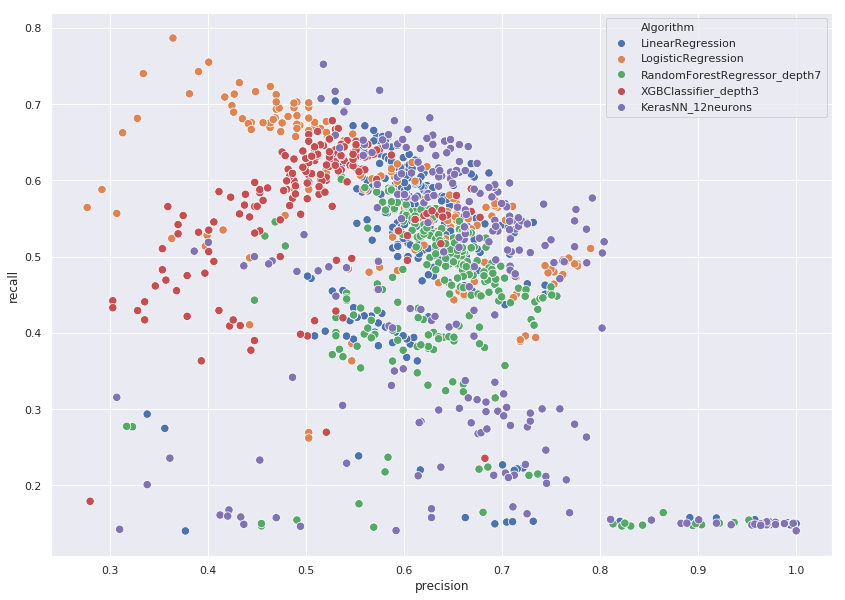

In [150]:
highest_scores = df[df.result_profit > 0][df.Algorithm.isin(["LogisticRegression","LinearRegression","KerasNN_12neurons", "XGBClassifier_depth3","RandomForestRegressor_depth7"])]
sns.scatterplot(x='precision', y='recall', hue='Algorithm', data=highest_scores,s=70)
plt.savefig('plots/main_algorithms_precision_recall_scatterplot.png')

## Violinplot

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


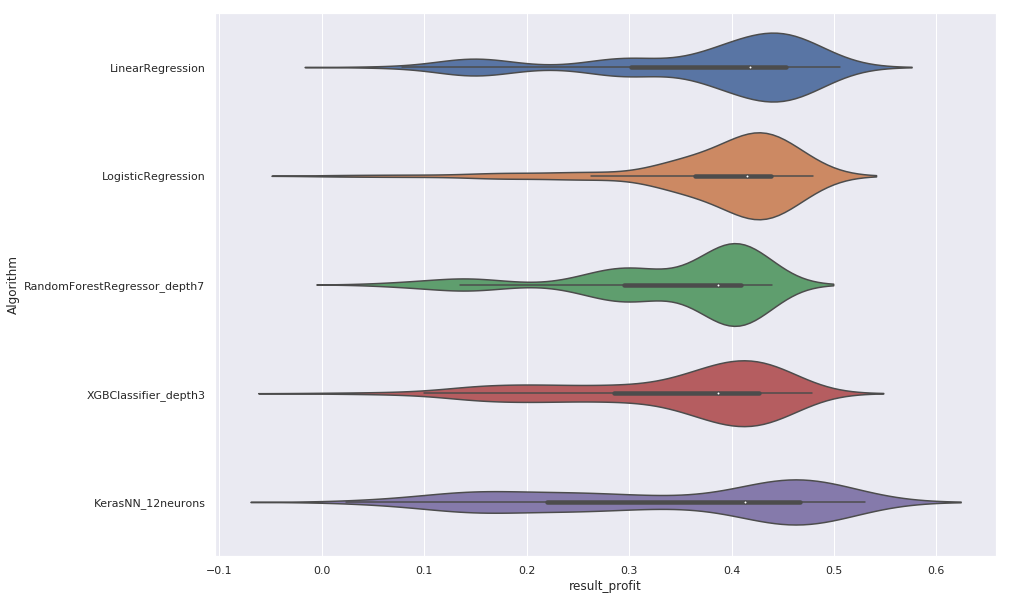

In [151]:
highest_scores = df[df.result_profit > 0][df.Algorithm.isin(["LogisticRegression","LinearRegression","KerasNN_12neurons", "XGBClassifier_depth3","RandomForestRegressor_depth7"])]
sns.violinplot(x='result_profit', y='Algorithm', data=highest_scores)
plt.savefig('plots/main_algorithms_profit_share_violinplot.png')

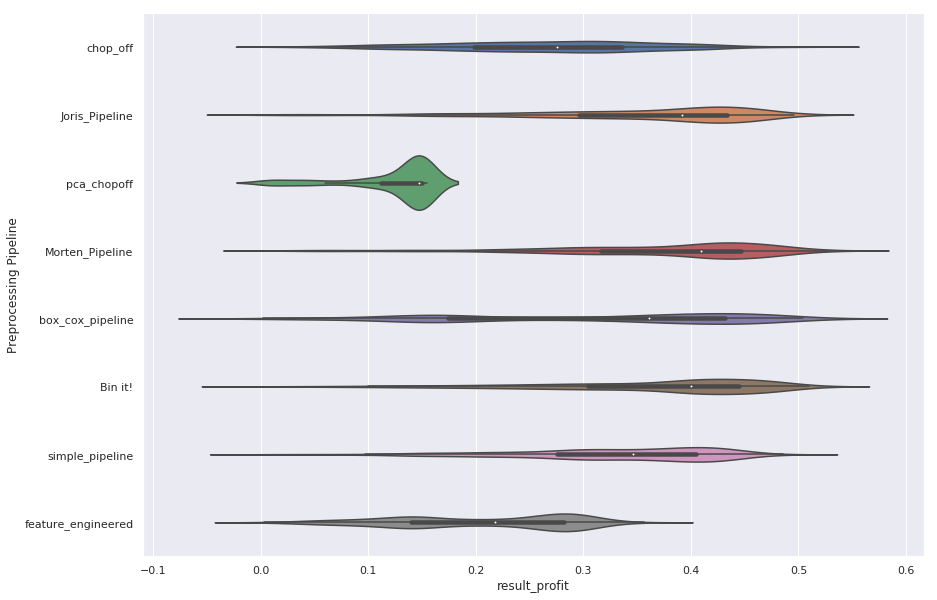

In [152]:
sns.violinplot(x='result_profit', y='Preprocessing Pipeline', data= df[df.result_profit > 0])
plt.savefig('plots/pipelines_profit_share_violinplot.png')